# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import os

In [4]:
df = pd.read_csv('25__iris.csv', sep=",")
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
pd.options.display.max_columns = None

# Analiza EDA Iris.csv

#### Zmiana nazw kolumn dla ułatwienia dalszej pracy

In [5]:
df.columns

Index(['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)',
       'długość płatka (petal length)', 'szerokość płatka (petal width)',
       'klasa (class)'],
      dtype='object')

In [6]:
df.rename(columns={
    'długość kielicha (sepal length)' : 'dł_kl',
    'szerokość kielicha (sepal width)' : 'sz_kl',
    'długość płatka (petal length)' : 'dł_pł',
    'szerokość płatka (petal width)' : 'sz_pł',
    'klasa (class)' : 'klasa'
}, inplace =True)
df.columns

Index(['dł_kl', 'sz_kl', 'dł_pł', 'sz_pł', 'klasa'], dtype='object')

In [7]:
df

,dł_kl,sz_kl,dł_pł,sz_pł,klasa
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Ogólny przegląd danych

#### Ilość rekordów i wiekość pliku wyjściowego

In [8]:
total_records = len(df)
file_size = os.path.getsize('25__iris.csv')
print(f"Wielkość pliku z danymi: {file_size} bajtów")
print(f"Całkowita liczba rekordów wynosi: {total_records}")

Wielkość pliku z danymi: 4702 bajtów
Całkowita liczba rekordów wynosi: 150


#### Pokaż informacje o kolumnach w zbiorze danych

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dł_kl   150 non-null    float64
 1   sz_kl   150 non-null    float64
 2   dł_pł   150 non-null    float64
 3   sz_pł   150 non-null    float64
 4   klasa   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


---
**Wnioski:**
1. Cztery kolumny zawirają dane liczbowe zmiennoprzecinkowe, jedna to typ uniwersalny czyli np stringi  
---

#### Pokaż 10 losowych wierszy

In [10]:
df.sample(10)

,dł_kl,sz_kl,dł_pł,sz_pł,klasa
36,5.5,3.5,1.3,0.2,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
28,5.2,3.4,1.4,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
93,5.0,2.3,3.3,1.0,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa


#### Ilość wartości unikatowych w każdej kolumnie

In [11]:
df.nunique()

dł_kl    35
sz_kl    23
dł_pł    43
sz_pł    22
klasa     3
dtype: int64

---
*Wnioski:*
1. Widać dużą unikatowość w każdej kolumnie zawirającej długość i szerokosć klielicha oraz płatka
2. Mamy 50 pomiarów dla każdego  z trzech gatunków (klasy)
3. Dokładność pomiaru to 1 mm
4. W losowych danych brak pustych wartości

---

#### Ilość wartości unikatowych dla każdej z 3 klas

In [12]:
df.groupby('klasa').nunique()

,dł_kl,sz_kl,dł_pł,sz_pł
klasa,,,,
Iris-setosa,15,16,9,6
Iris-versicolor,21,14,19,9
Iris-virginica,21,13,20,12


---
*Wnioski:*
1. Mamy znaczne zróżnicowanie wymiarów płatków i kielichów dla każdego z trzech gatunków .
2. Poniżej podstawowe informacje o każdym z nich:

---

[Iris Setosa](https://en.wikipedia.org/wiki/Iris_setosa)

![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg)

[Iris Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor)

![IrisVersicolor](https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg)

[Iris Virginica](https://en.wikipedia.org/wiki/Iris_virginica)

![IrisVersicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1280px-Iris_virginica_2.jpg)

#### Podsumowanie każdej kolumny numerycznej

In [13]:
df.describe()

,dł_kl,sz_kl,dł_pł,sz_pł
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


---
*Wnioski:*
1. Widać rozpiętośc wyników w całym zbiorze danych, szczególnie w stosunku do wymiarów płatków. 
2. Znacznie większe wartości oddchyleń standardowych dla płatków
3. Różnice pomiędzy medianą a średnią, co sugeruje dużą ilość wartości skrajnych dla płatków

---

#### Podsumowanie dla każdej kolumny numerycznej z podziałem na gatunki

In [15]:
agg_df = df.groupby('klasa', as_index=False).agg({
    'dł_kl':  ['min', 'max', 'mean', 'median', 'std'],
    'sz_kl' :  ['min', 'max', 'mean', 'median', 'std'],
}).round(2)
agg_df

klasa dł_kl                         sz_kl                        
                     min  max  mean median   std   min  max  mean median   std
0      Iris-setosa   4.3  5.8  5.01    5.0  0.35   2.3  4.4  3.42    3.4  0.38
1  Iris-versicolor   4.9  7.0  5.94    5.9  0.52   2.0  3.4  2.77    2.8  0.31
2   Iris-virginica   4.9  7.9  6.59    6.5  0.64   2.2  3.8  2.97    3.0  0.32

In [17]:
agg_df = df.groupby('klasa', as_index=False).agg({
    'dł_pł':  ['min', 'max', 'mean', 'median', 'std'],
    'sz_pł' :  ['min', 'max', 'mean', 'median', 'std'],
}).round(2)
agg_df

klasa dł_pł                         sz_pł                        
                     min  max  mean median   std   min  max  mean median   std
0      Iris-setosa   1.0  1.9  1.46   1.50  0.17   0.1  0.6  0.24    0.2  0.11
1  Iris-versicolor   3.0  5.1  4.26   4.35  0.47   1.0  1.8  1.33    1.3  0.20
2   Iris-virginica   4.5  6.9  5.55   5.55  0.55   1.4  2.5  2.03    2.0  0.27

---
*Wnioski:*
1. Dla poszczególnych gatunków różnice w płatkach i kielichach są zdevydowanie mniejsze
2. Std nie przekracza 20% 
3. mediana prawie równa średniej, co sugeruje znikomy wpływ wartości skrajnych
4. Znacznie mnijesza długość i szerokość płatka dla **Iris Sectosa**, może być to cecha do idnetyfikacji gatunkowej

---


In [18]:
df[df.duplicated()]

,dł_kl,sz_kl,dł_pł,sz_pł,klasa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


---
*Wnioski:*
1. Pomijalna ilość wartości zduplikowanych, bez wpływu na analizę. 
---

## Analiza brakujących wartości

In [19]:
braki = df.isnull().sum()
print(braki)

dł_kl    0
sz_kl    0
dł_pł    0
sz_pł    0
klasa    0
dtype: int64


---
*Wnioski:*
1. Brak brakujących wartości,
---

## Analiza pojedyńczy zmiennych

#### Histogram

array([[<Axes: title={'center': 'dł_kl'}>,
        <Axes: title={'center': 'sz_kl'}>],
       [<Axes: title={'center': 'dł_pł'}>,
        <Axes: title={'center': 'sz_pł'}>]], dtype=object)

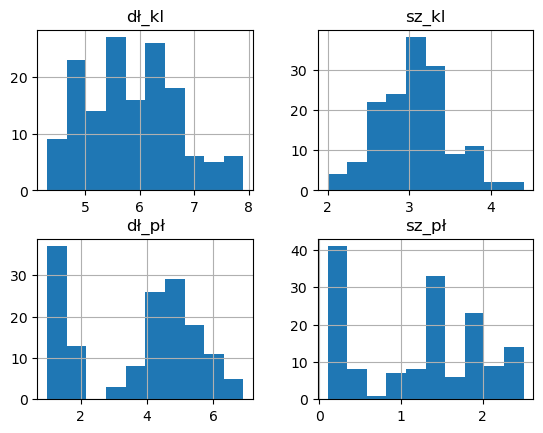

In [20]:
df.hist()

#### Wykres słupkowy dla poszczególnych gatunków

<Axes: xlabel='klasa'>

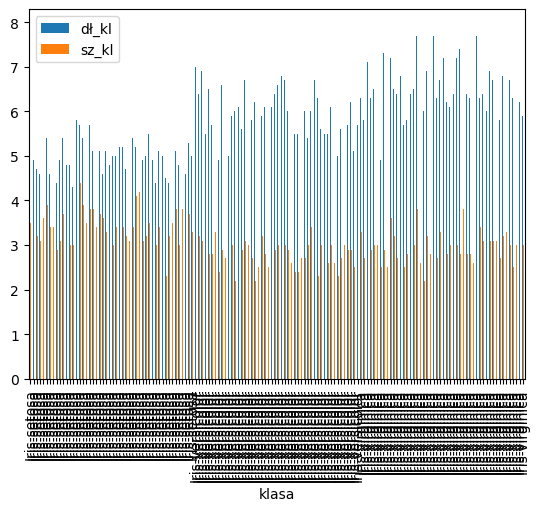

In [24]:
df.plot(kind='bar',x='klasa',y=['dł_kl','sz_kl'])

<Axes: xlabel='klasa'>

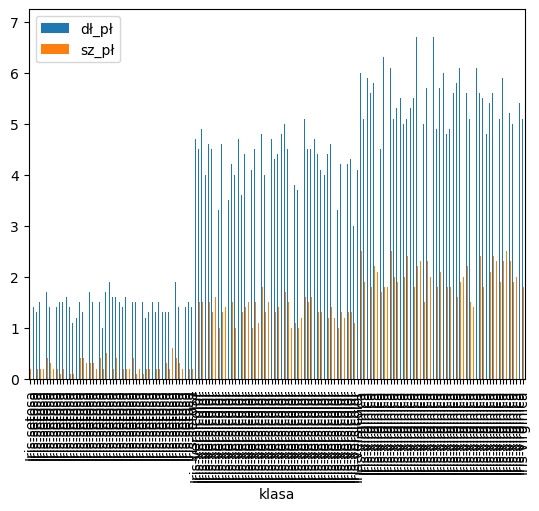

In [27]:
df.plot(kind='bar',x='klasa',y=['dł_pł','sz_pł'],)

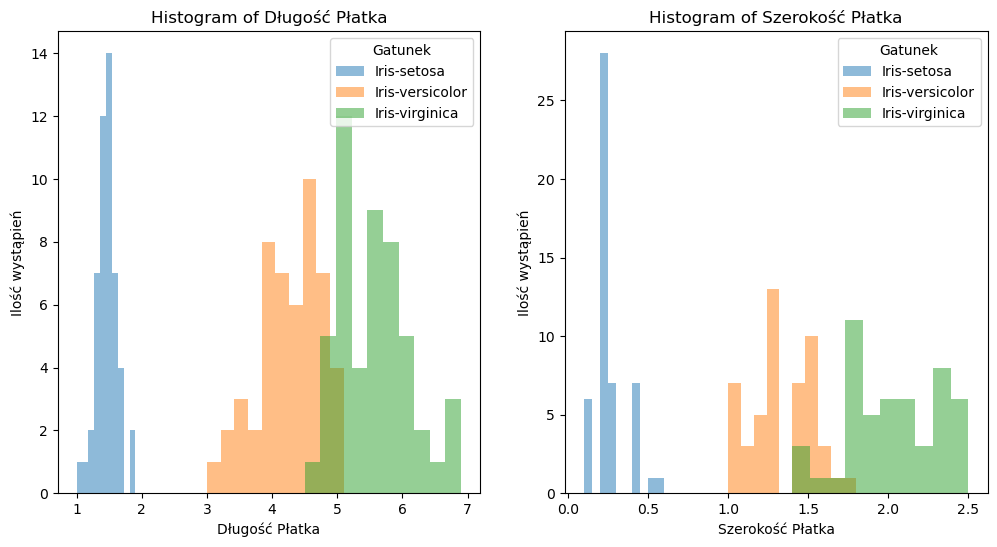

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for class_name, group in df.groupby('klasa'):
    axes[0].hist(group['dł_pł'], bins=10, alpha=0.5, label=class_name)
axes[0].set_title('Histogram of Długość Płatka')
axes[0].set_xlabel('Długość Płatka')
axes[0].set_ylabel('Ilość wystąpień')
axes[0].legend(title='Gatunek')

for class_name, group in df.groupby('klasa'):
    axes[1].hist(group['sz_pł'], bins=10, alpha=0.5, label=class_name)
axes[1].set_title('Histogram of Szerokość Płatka')
axes[1].set_xlabel('Szerokość Płatka')
axes[1].set_ylabel('Ilość wystąpień')
axes[1].legend(title='Gatunek')

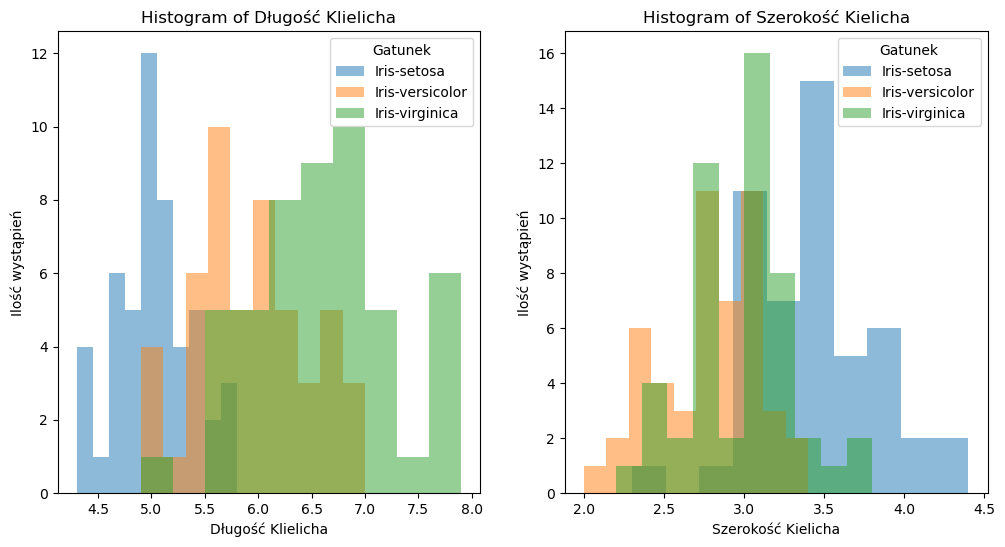

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for class_name, group in df.groupby('klasa'):
    axes[0].hist(group['dł_kl'], bins=10, alpha=0.5, label=class_name)
axes[0].set_title('Histogram of Długość Klielicha')
axes[0].set_xlabel('Długość Klielicha')
axes[0].set_ylabel('Ilość wystąpień')
axes[0].legend(title='Gatunek')

for class_name, group in df.groupby('klasa'):
    axes[1].hist(group['sz_kl'], bins=10, alpha=0.5, label=class_name)
axes[1].set_title('Histogram of Szerokość Kielicha')
axes[1].set_xlabel('Szerokość Kielicha')
axes[1].set_ylabel('Ilość wystąpień')
axes[1].legend(title='Gatunek')

---
*Wnioski:*
1. Histogram pokazuje, że dla kielichów mamy wartości rozłożone, bez szczególnego wyodrębnienia danego wymiaru, najwiecej jest kileichów w okolicach szerokość 3 cm, długośc 4 cm, 5,5 cm i 6 cm. Dla płatków wyraźnie odstają wartości długość poniżej 2 cm  i szerokośc o,5 cm.
2. Znajduje to potwierdzenie w wykresach słupkowym dla poszczególnych gatunków. Jednoznacznie wymiary płatka są mniejsze dla **Iris Setosa**. Potwierdza to tezę o uzyteczności tej cechy do identyfikacji gatunku
---

#### Tworzymy dodatkowe kolumny  - wielkość kielicha i płatka w cm2

In [39]:
df['wlk_kl'] = df['dł_kl'] * df['sz_kl']
df['wlk_pł'] = df['dł_pł'] * df['sz_pł']

In [40]:
df

,dł_kl,sz_kl,dł_pł,sz_pł,klasa,wlk_kl,wlk_pł
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,20.10,11.96
146,6.3,2.5,5.0,1.9,Iris-virginica,15.75,9.50
147,6.5,3.0,5.2,2.0,Iris-virginica,19.50,10.40
148,6.2,3.4,5.4,2.3,Iris-virginica,21.08,12.42


### Wykresy słupkowe z wielkości kielicha i płatka

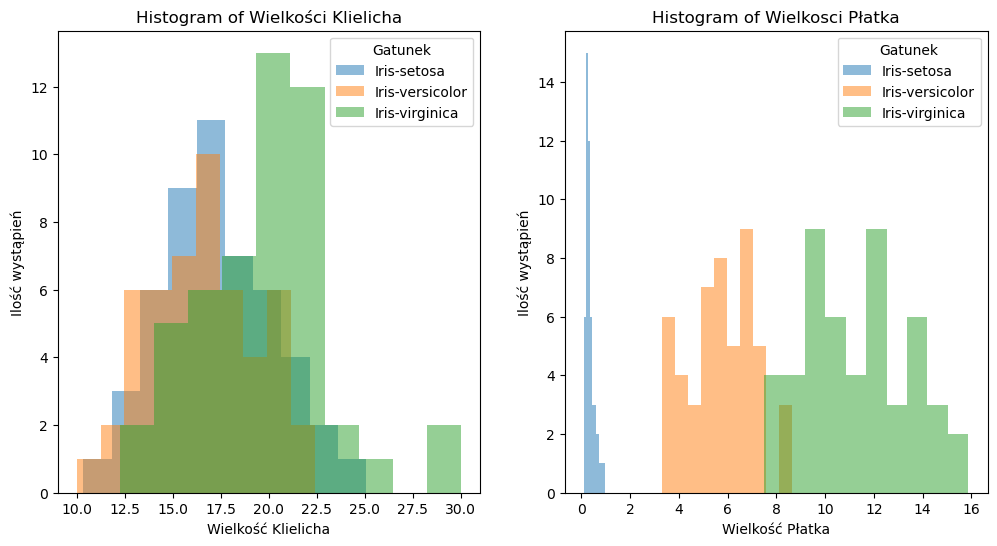

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for class_name, group in df.groupby('klasa'):
    axes[0].hist(group['wlk_kl'], bins=10, alpha=0.5, label=class_name)
axes[0].set_title('Histogram of Wielkości Klielicha')
axes[0].set_xlabel('Wielkość Klielicha')
axes[0].set_ylabel('Ilość wystąpień')
axes[0].legend(title='Gatunek')

for class_name, group in df.groupby('klasa'):
    axes[1].hist(group['wlk_pł'], bins=10, alpha=0.5, label=class_name)
axes[1].set_title('Histogram of Wielkosci Płatka')
axes[1].set_xlabel('Wielkość Płatka')
axes[1].set_ylabel('Ilość wystąpień')
axes[1].legend(title='Gatunek')

---
*Wnioski:*
1. Zgodnie z przewidywaniami wilekość kielicha rozumiana jako iloczyn długości i szerokości, nie definiuje różnicy pomiędzy gatunkami. Znaczna część wyników jest częścią wspólną na wykresie.
2. Wielkość płatka definiowana jak w punkcie 1, pokazuje że wartości te mogą wskazywać na poszczególne gatunki. Jednoznacznie dla *Setosa*, ale dla *Verasicolor* i *Virginica* istnieje pewwien niewielki margines błędu, gdy oprzemy się tylko na tej zmniennej.
---

## Transformacji danych

---
*Wnioski:*
1. NIe ma zastosowania w tej analizie
---

## Analiza relacji między zmiennymi

### Wykresy punktowy

df.plot(kind='scatter',x='dł_kl',y='sz_kl', title="Wykres pukntowy długość,szerokość kielicha")

<Axes: title={'center': 'Wykres pukntowy długość,szerokość płatka'}, xlabel='dł_pł', ylabel='sz_pł'>

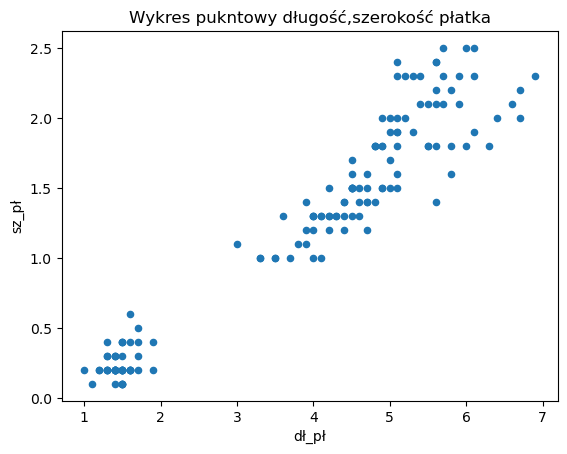

In [56]:
df.plot(kind='scatter',x='dł_pł',y='sz_pł', title="Wykres pukntowy długość,szerokość płatka")

<Axes: title={'center': 'Wykres pukntowy wielkość kielicha i płatka'}, xlabel='wlk_kl', ylabel='wlk_pł'>

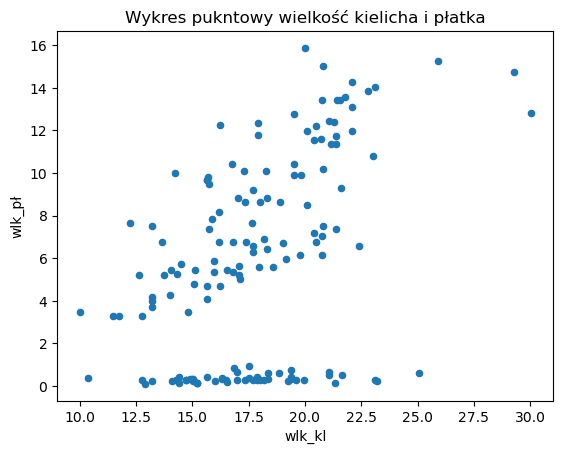

In [57]:
df.plot(kind='scatter',x='wlk_kl',y='wlk_pł', title="Wykres pukntowy wielkość kielicha i płatka")

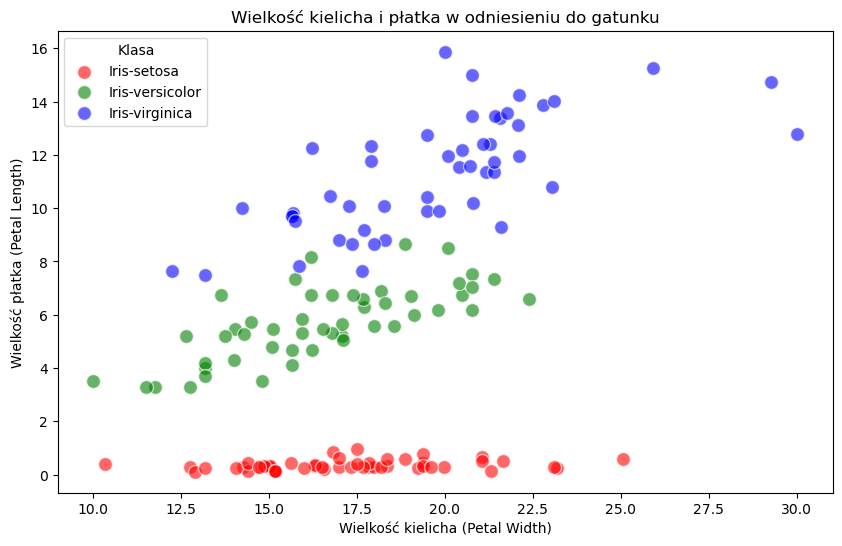

In [60]:
plt.figure(figsize=(10, 6))
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for class_name, color in colors.items():
    subset = df[df['klasa'] == class_name]
    plt.scatter(subset['wlk_kl'], subset['wlk_pł'], 
                c=color, label=class_name, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Wielkość kielicha (Petal Width)')
plt.ylabel('Wielkość płatka (Petal Length)')
plt.title('Wielkość kielicha i płatka w odniesieniu do gatunku')
plt.legend(title='Klasa')

---
*Wnioski:*
1. Długość i szerokość kielicha nie wskazuje na korleację
2. Długośc szerokosć płatka silna korelacja dodatnia
3. Wielkość płatka i kielicha wskazuje na zależność dodatnią dla *Versicolor* i *Virginica* oraz brak takiej zależności dla *Setosa*
---

### Macierz korelacji

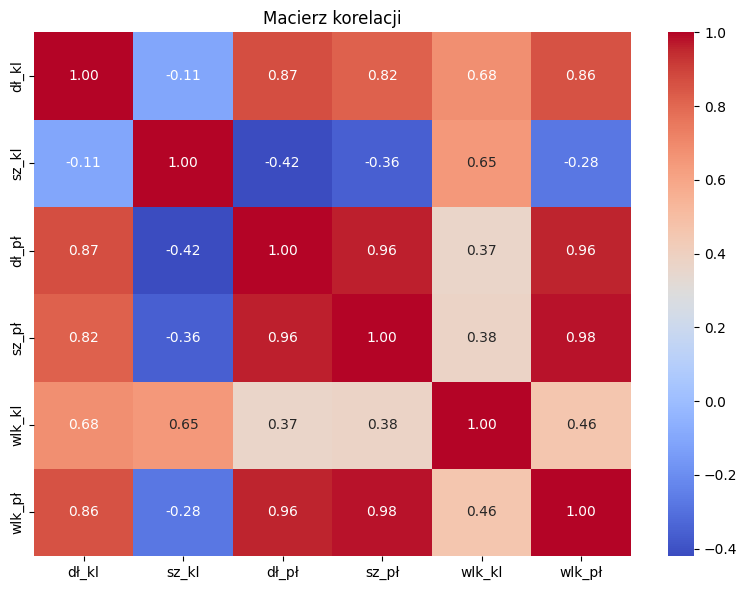

In [33]:
# Usuwamy kolumny typu 'object' lub 'string'
df_num = df.select_dtypes(include=['number'])
macierz_korelacji = df_num.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(macierz_korelacji, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.tight_layout()


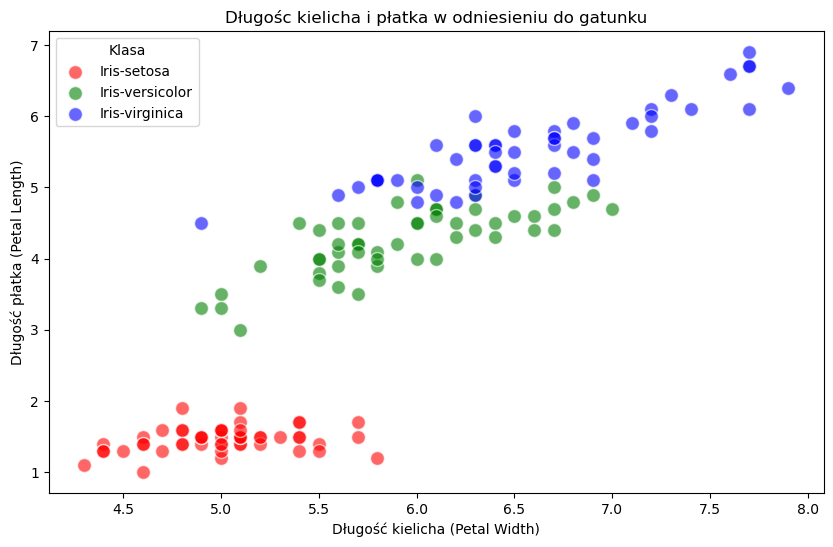

In [65]:
plt.figure(figsize=(10, 6))
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for class_name, color in colors.items():
    subset = df[df['klasa'] == class_name]
    plt.scatter(subset['dł_kl'], subset['dł_pł'], 
                c=color, label=class_name, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Długość kielicha (Petal Width)')
plt.ylabel('Długość płatka (Petal Length)')
plt.title('Długośc kielicha i płatka w odniesieniu do gatunku')
plt.legend(title='Klasa')

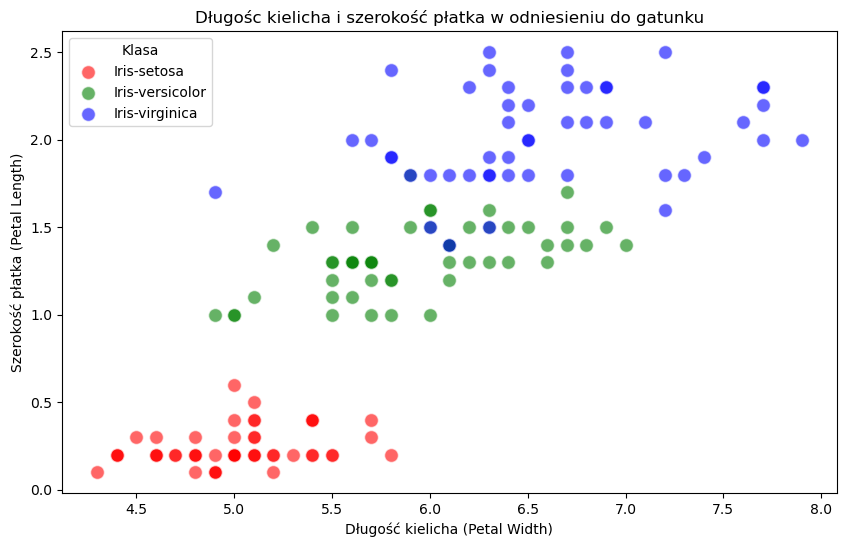

In [67]:
plt.figure(figsize=(10, 6))
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for class_name, color in colors.items():
    subset = df[df['klasa'] == class_name]
    plt.scatter(subset['dł_kl'], subset['sz_pł'], 
                c=color, label=class_name, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Długość kielicha (Petal Width)')
plt.ylabel('Szerokość płatka (Petal Length)')
plt.title('Długośc kielicha i szerokość płatka w odniesieniu do gatunku')
plt.legend(title='Klasa')

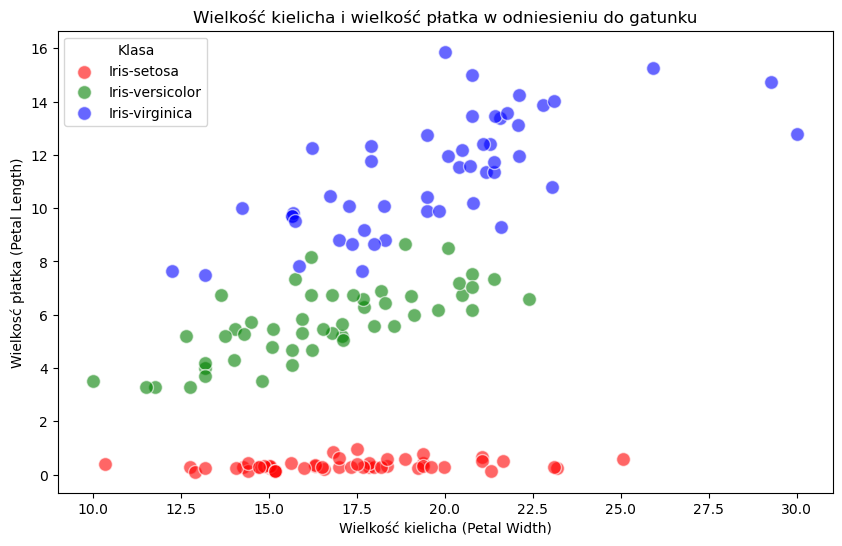

In [90]:
plt.figure(figsize=(10, 6))
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for class_name, color in colors.items():
    subset = df[df['klasa'] == class_name]
    plt.scatter(subset['wlk_kl'], subset['wlk_pł'], 
                c=color, label=class_name, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Wielkość kielicha (Petal Width)')
plt.ylabel('Wielkosć płatka (Petal Length)')
plt.title('Wielkość kielicha i wielkość płatka w odniesieniu do gatunku')
plt.legend(title='Klasa')

---
*Wnioski:*
1. Silna korelacja dodatnia długości i szerokości płatka
2. Silna korelacja dodatnia długości kielicha i długości płatka oraz długości kielicha i szeroości płatka, ale tylko dla gatunków *Versicolor* i *Virginica*
3. Wielkość płatka nie koreluje się silnie z wielkością kielicha i tutaj też korlecja najsłabsza dla *Setosa*
---

## Analiza wartości odstająch

<Axes: >

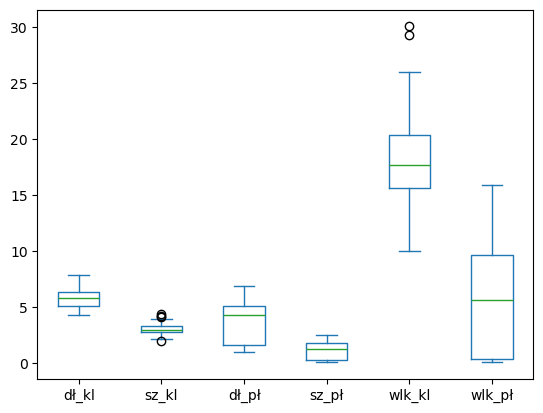

In [72]:
df.plot(kind='box')

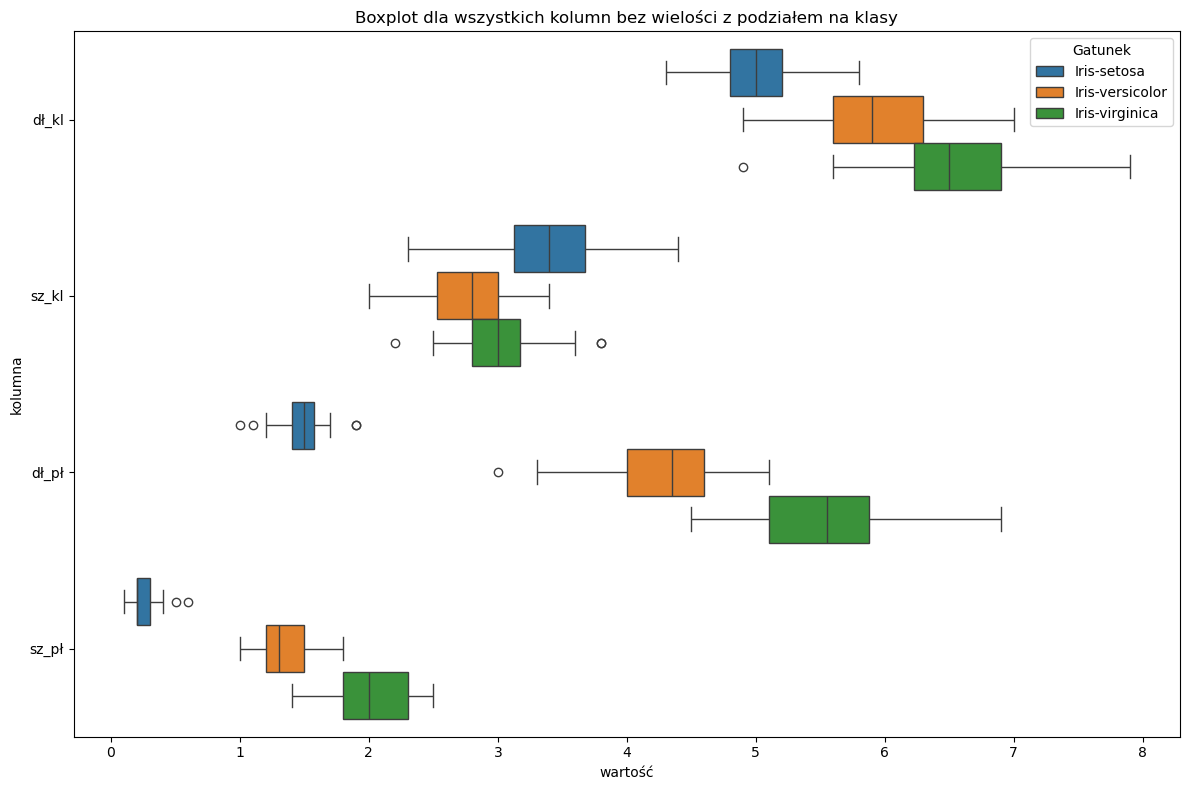

In [89]:
df_bez_wlk = df.drop(columns=['wlk_kl','wlk_pł'])

df_bez_wlk = df_bez_wlk.melt(id_vars='klasa', var_name='kolumna', value_name='wartość')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_bez_wlk, x='wartość', y='kolumna', hue='klasa', orient='h')
plt.title('Boxplot dla wszystkich kolumn bez wielości z podziałem na klasy')
plt.legend(title='Gatunek')
plt.tight_layout()



---
*Wnioski:*
1. Mała ilość wartości odstających, jedynie w szerokości i długości płatka
2. W przypadku wymiarów kielicha, wartości generalnie w pierwszych trzech kwartylach zachodzą na siebie, więc jednoznaczne ocena gatunku na tej podstawie jest utrudniona. Ewentualnie można z pewnym prawdopodobieństwem wskazać Setosa, gdyż dł kielicha jest najmniejsza w 50% danych. Szerokość klielicha nie pozwala na takie wnioski.
3. Szerokość i długośc platków wskazuje na *Setosa*, gdyż są one zdecydowanie mniejsze ze wszystkich trzech. Co do pozostałych dwóch takiej jednoznaczności już nie ma

## Wnioski końcowe

1. Różnorodność wyników pomiarów potwierdza fakt, że natura lubi zmienność :)
2. Jednakże z tych danych można wyciągnąć pewne wnioski:
    - pomiary wielkości kielicha kielicha  nie będą jednoznacznie pomocne przy określaniu gatunku badanych roślin, wnioski wyciągnięte na podstawie tych danych będą obarczone dużym, błędem. Do tej analizy konieczne będą dodatkowe elementy
    - wymiary płatków. długosć i szerokość, a przede wszystkim wielkość rozumiana jako iloczyn długości o szerokości, wskazują na korlecję z okreslonymi gatunkami. Jednoznacznie definiują *Iris-Setosa* oraz z dużym prawdopodbieństwem (szczególnie wielkość) wskazują na pozostałe dwa gatunki.
    - ciekawa jest też korleacja dodatnia dłukości kielicha i długości płatka dla *Versicolor* i *Verginica*. Niski poziom tej korelacji może potwierdzać gatunek *Setosa*. W mniejszym stopniu ta zależność zachodzi dla długości kliecha i szerokości płatka.
    - zachodzi też korelacja dodatnia szerokości płatka i jego długości